In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten,Dropout,MaxPooling2D
from keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers
import matplotlib.pyplot as plt


In [ ]:
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

In [ ]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_data = np.asarray(train_df,dtype=np.float32)
test_data = np.asarray(test_df,dtype=np.float32)
x_train = train_data[:,1:]/255
y_train = train_data[:,0]
x_test = test_data[:,1:]/255
y_test = test_data[:,0]

In [ ]:
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=.25,random_state=2345)

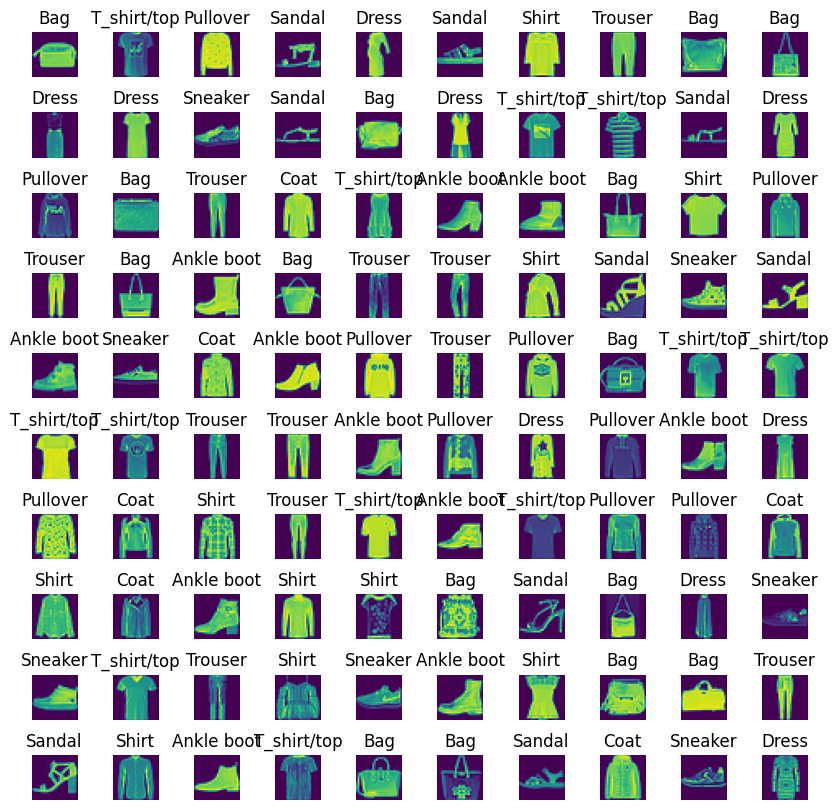

In [ ]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))

for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(x_train[i].reshape(28,28))
    plt.title(class_names[int(y_train[i])])
    plt.axis('off')
plt.subplots_adjust(hspace=.7,wspace=0.8)
plt.show()

In [ ]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
x_val = x_val.reshape(x_val.shape[0],28,28,1)
x_train.shape

(45000, 28, 28, 1)

In [ ]:
# Data augmentation
data_augmentation = Sequential([
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomFlip("horizontal")
])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

# Model architecture
model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1), padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [ ]:
# Build the model
model.build(input_shape=(None, 28, 28, 1))

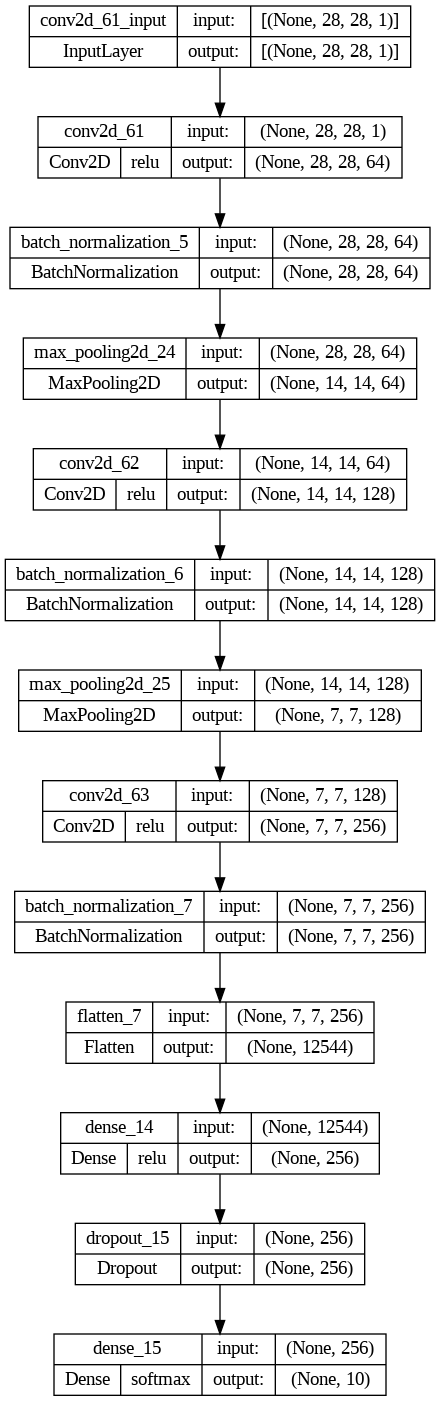

In [ ]:
plot_model(model,show_shapes=True,show_layer_names=True,show_layer_activations=True)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(learning_rate=0.0005),metrics=['accuracy'])

In [ ]:
# Fit the model with augmented data
train_generator = datagen.flow(x_train, y_train, batch_size=64, subset='training')
val_generator = datagen.flow(x_train, y_train, batch_size=64, subset='validation')
hist = model.fit(train_generator, epochs=120, validation_data=val_generator, verbose=1)

Epoch 1/120
563/563 [==============================] - 295s 518ms/step - loss: 1.2596 - accuracy: 0.7178 - val_loss: 0.9708 - val_accuracy: 0.7794
Epoch 2/120
563/563 [==============================] - 286s 509ms/step - loss: 0.8999 - accuracy: 0.7904 - val_loss: 0.7898 - val_accuracy: 0.8117
Epoch 3/120
563/563 [==============================] - 285s 507ms/step - loss: 0.7430 - accuracy: 0.8258 - val_loss: 0.6636 - val_accuracy: 0.8388
Epoch 4/120
563/563 [==============================] - 283s 503ms/step - loss: 0.6616 - accuracy: 0.8429 - val_loss: 0.6162 - val_accuracy: 0.8468
Epoch 5/120
563/563 [==============================] - 286s 509ms/step - loss: 0.6086 - accuracy: 0.8538 - val_loss: 0.5745 - val_accuracy: 0.8677
Epoch 6/120
563/563 [==============================] - 285s 506ms/step - loss: 0.5727 - accuracy: 0.8636 - val_loss: 0.6163 - val_accuracy: 0.8416
Epoch 7/120
563/563 [==============================] - 281s 499ms/step - loss: 0.5452 - accuracy: 0.8718 - val_loss: 0

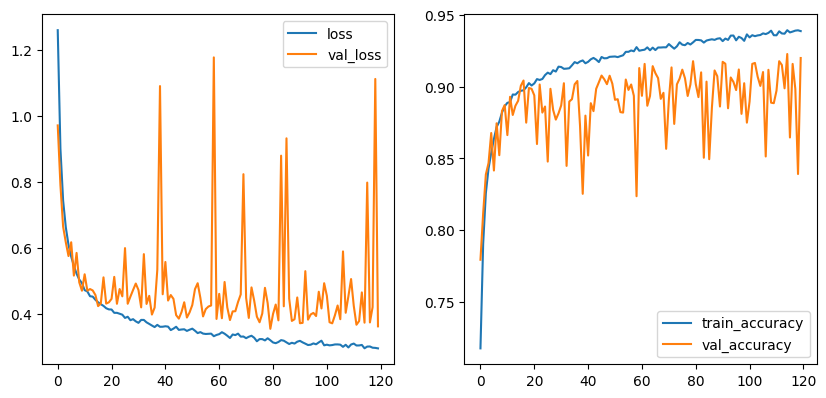

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val_loss')
plt.legend()

plt.subplot(222)
plt.plot(hist.history['accuracy'],label='train_accuracy')
plt.plot(hist.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [ ]:
score = model.evaluate(x_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.3570
Test accuracy : 0.9252


In [ ]:
predicted_prob = model.predict(x_test)
predicted_classes = np.argmax(predicted_prob,axis=1)
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted_classes,target_names=class_names))

313/313 [==============================] - 19s 58ms/step
              precision    recall  f1-score   support

 T_shirt/top       0.89      0.83      0.86      1000
     Trouser       0.99      1.00      1.00      1000
    Pullover       0.92      0.86      0.89      1000
       Dress       0.94      0.91      0.93      1000
        Coat       0.88      0.90      0.89      1000
      Sandal       0.99      0.99      0.99      1000
       Shirt       0.73      0.83      0.78      1000
     Sneaker       0.96      0.98      0.97      1000
         Bag       0.99      0.99      0.99      1000
  Ankle boot       0.98      0.96      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



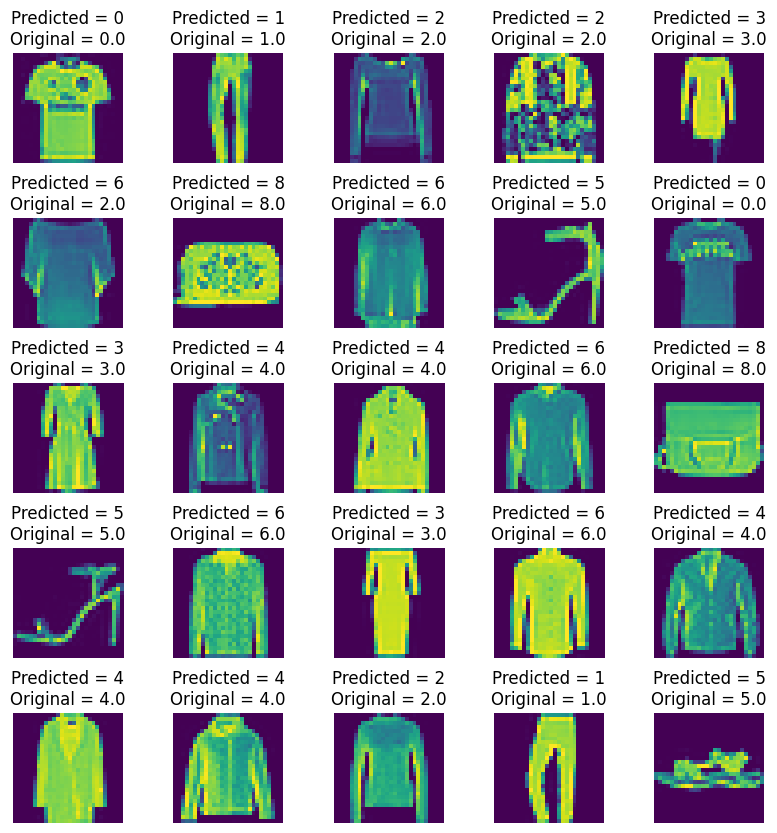

In [ ]:
fig,axes = plt.subplots(5,5,figsize=(10,10))
axes = axes.ravel()
for i in range(25):
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title(f"Predicted = {predicted_classes[i]}\nOriginal = {y_test[i]}" )
    
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.5)